### ¿Qué es ruido impulsivo "Sal y pimienta" en imágenes?

El ruido impulsivo o sal y pimienta (salt-and-pepper) se trata de una clase de contaminación que es causada por defectos en los pixeles de los sensores de las cámaras, una locación en memoria del hardware defectuosa o directamente ruido en un canal de transmisión [1].

Estos defectos provocan una imagen corrupta con una serie de pixeles con ruido que solo pueden tomar valores máximos o mínimos de color y esto se conoce coloquialmente como sal y pimienta, donde la sal hace ilusión a todos los pixeles que entran en el valor máximo o blanco y la pimienta son aquellos que alcanzan el valor mínimo o negro.

Por otro lado, el procesamiento de la imagen que realiza después de la captura de esta, requiere de un proceso de detección y eliminación del ruido. En este punto entran los filtros de remoción, siendo el más usual el filtro mediano de tipo no linear que es muy utilizado por su alta eficiencia y buena eliminación de ruido pero con la consideración que con una corrupción mayor de 50% algunos detalles de la imagen original quedaran manchadas.

La ecuación matemática que modela el comportamiento del ruido impulsivo en una imagen es la siguiente:
$$
\begin{equation}
  P_{sp} ( z )  = \Biggl\{ \hspace{3mm}
\begin{align*}
  P_p \hspace{1mm} , \hspace{3mm} z=p \\
  P_s \hspace{1mm} , \hspace{3mm} z=s]
\end{align*}
\end{equation}
$$
De la anterior ecuación indicamos que "***z***" es el porcentaje de pixeles que tendrán ruido y para este sea homogéneo  "***z***" se dividira en dos, siendo la mitad corrupción blanca y otra mitad negra.

In [1]:
###
# Author: Murilo Barrientos Alexis Adrian
###
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random as rd
from math import sqrt

In [2]:
# Clase que genera diferentes tipos de ruidos
class GenerateNoise:
    def __init__(self):
        print("Todo salio bien")

    # Método que genera a una imagen un ruido de sal y pimienta por medio de un porcentaje
    def impulsive_noise(self, path_img=None, noise_percentage=0):
        if path_img is None or noise_percentage == 0:
            print("Metiste mal los valores!")

        else:
            image = cv.imread(path_img)
            self.size_img = image.shape[0]*image.shape[1]
            self.noise_percentage_to_use = (noise_percentage*self.size_img)/200

            if image.shape[2] > 1:
                self.pepper = [0, 0, 0]
                self.salt = [255, 255, 255]
            elif image.shape[2] == 1:
                self.pepper = 0
                self.salt = 255

            # pixeles blancos
            for x in range(int(self.noise_percentage_to_use)):
                position_x = rd.randrange(2, image.shape[0]-2)
                position_y = rd.randrange(2, image.shape[1]-2)

                image[position_x][position_y] = self.salt

            # pixeles negros
            for x in range(int(self.noise_percentage_to_use)):

                position_x = rd.randrange(2, image.shape[0]-2)
                position_y = rd.randrange(2, image.shape[1]-2)

                image[position_x][position_y] = self.pepper

            # Retorna la imagen contaminada
            return image

        # Método que genera a una imagen un ruido Guassiano por medio de indicar la desviación estándar
    def guassiano_noise(self, path_img=None, standard_deviation=1):
        if path_img != None:
            image = cv.imread(path_img)
            self.std_dev = standard_deviation
            dist_nor = np.random.normal(0, self.std_dev, size=image.shape[0:2])
            for i in range(dist_nor.shape[0]):
                for j in range(dist_nor.shape[1]):
                    dist_nor[i][j] = int(round(((dist_nor[i][j])*self.std_dev) + 127))

            dist_nor = np.array(dist_nor, dtype=np.uint8)

            for i in range(dist_nor.shape[0]):
                for j in range(dist_nor.shape[1]):
                    for k in range(image.shape[2]):
                        if dist_nor[i][j] == 127:
                            continue
                        else:
                            image[i][j][k] = dist_nor[i][j]

            return image
        else:
            print("por si todo sale mal")

                
            

Todo salio bien


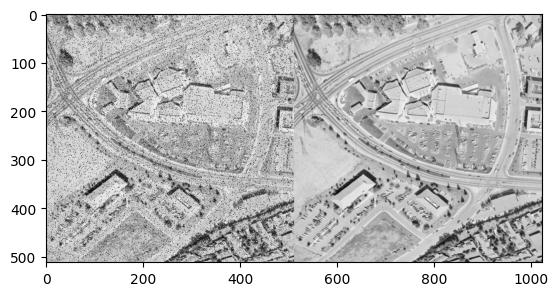

In [3]:
image = GenerateNoise().impulsive_noise("Imagenes Originales Gris/Aerial_gray.png", 10)
image_1 = cv.imread("Imagenes Originales Gris/Aerial_gray.png")
final_frame = cv.hconcat((image, image_1))

plt.imshow(final_frame)

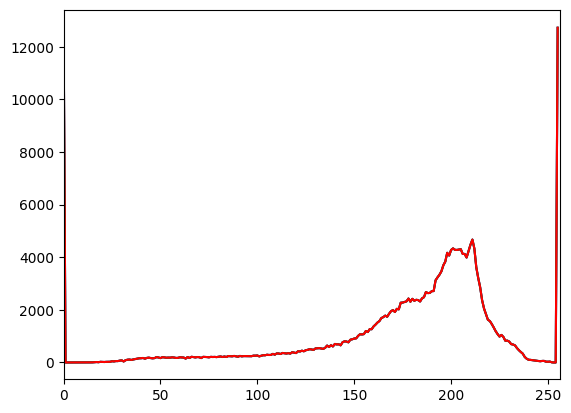

In [4]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

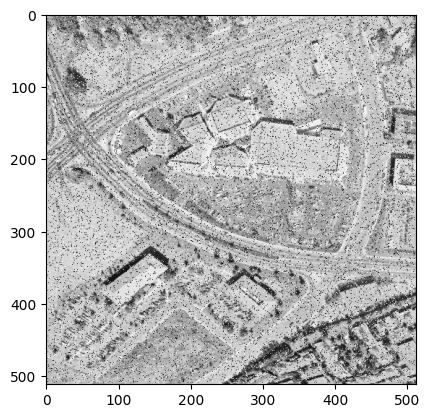

In [5]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [6]:
image[0][9] = [0, 0, 0]

In [7]:
image.shape[0:2]

(512, 512)

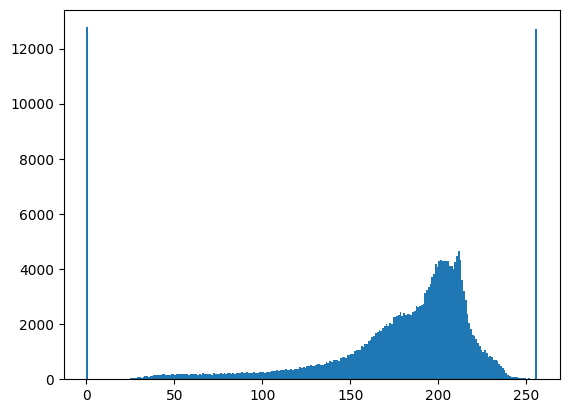

In [8]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

***¿Qué es el ruido guassiano en imágenes?***

El ruido gaussiano que se adicionan a una imagen es el que ensucia la señal, de tal manera que se obtienen pixeles al azar por toda la imagen que se guían en su tonalidad en base a una distribución uniforme de color.

Su importancia radica en que debido a que está presente de manera inherente en el ambiente, más por el hecho que los factores que lo generan son muchos y muy diversos, un ejemplo es el ruido blanco que percibe las cuando la señal de la estación de televisión es débil, ahora bien, especificando en las imágenes, a la hora de su obtención o capturo, el ruido gaussiano se genera en ocasiones con baja iluminación donde es más fácil percibir fotones de ruido originados de distintos lugares, pero cabe recalcar que no solo en estas ocasiones este ruido se modela por medio de la distribución normal o de Gauss, si no que también hay casos con la distribución de Poison.

En la mayoría de la literatura cuando se trata de agregar este tipo de ruido a una imagen se guían por la distribución normal estándar donde el valor μ es igual a 0 y solo se hace variar le desviación estándar o en su defecto la varianza, aunque estas dos últimas depende directamente la una de la otra, por ende, mover una hace que la otra también se mueva.

Como último, la ecuación que modela el ruido gaussiano es la misma de la distribución del mismo nombre, pero en este caso, como ya se mencionó, mu o la media (***μ***) lo evaluamos en 0 y variamos la deviación estándar (***σ***).

$$

  \begin{equation}
    P_G = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}  
  \end{equation}

$$

In [9]:
def distribucion_normal(x, standard_deviation):
    return (1/(standard_deviation*np.sqrt(2*np.pi)))*((np.e)**((-1/2)*((x/standard_deviation)**2)))
    

In [10]:
x = np.linspace(4, -4, 100)

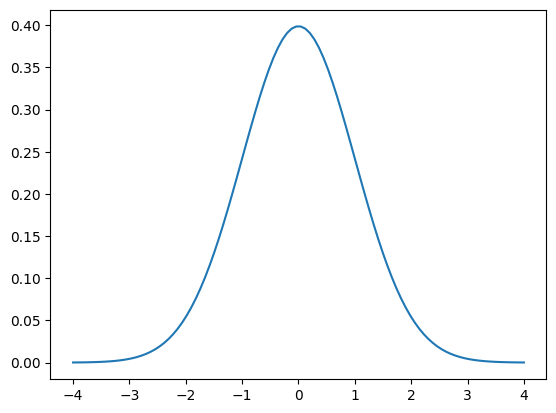

In [11]:
plt.plot(x, distribucion_normal(x, standard_deviation=1))

(512, 512, 3)


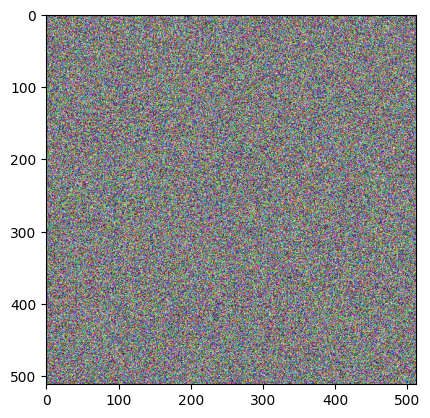

In [25]:
dist_nor = np.random.normal(0, 1, size=image.shape)
dist_nor
desviación = 100
for i in range(dist_nor.shape[0]):
    for j in range(dist_nor.shape[1]):
        for k in range(dist_nor.shape[2]):
            dist_nor[i][j][k] = int(round(((dist_nor[i][j][k])*desviación) + 127, ndigits=0))

dist_nor = np.array(dist_nor, dtype=np.uint8)
print(dist_nor.shape)
n = plt.imshow(dist_nor)
n


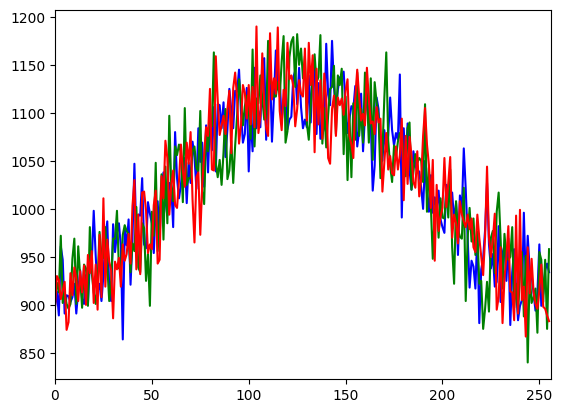

In [26]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([dist_nor],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [14]:
type(image[1][2][1])%alias

numpy.uint8

Todo salio bien


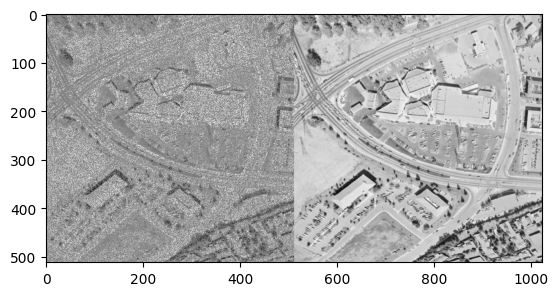

In [40]:
n = GenerateNoise().guassiano_noise("Imagenes Originales Gris/Aerial_gray.png", .9)
image_1 = cv.imread("Imagenes Originales Gris/Aerial_gray.png")
final_frame = cv.hconcat((n, image_1))

plt.imshow(final_frame)

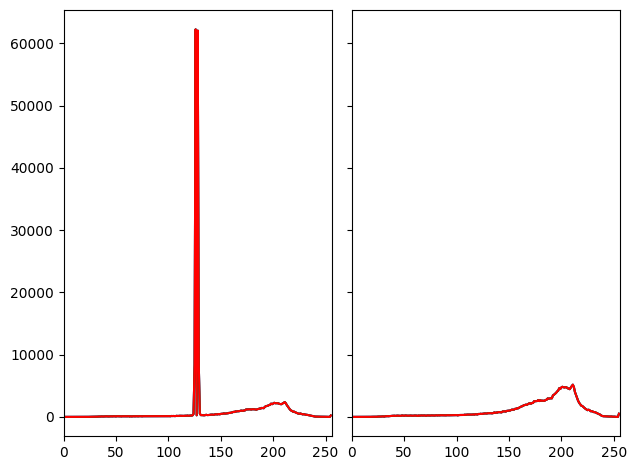

In [41]:
color = ('b','g','r')
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

for i,col in enumerate(color):
    histr = cv.calcHist([n],[i],None,[256],[0,256])
    axs[0].plot(histr,color = col)
    axs[0].set_xlim([0,256])

for i,col in enumerate(color):
    histr_1 = cv.calcHist([image_1],[i],None,[256],[0,256])
    axs[1].plot(histr_1,color = col)
    axs[1].set_xlim([0,256])
plt.show()

NameError: name 'ima' is not defined